In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import re

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Lecture 8: Bias-Variance Trade Off, Feature Extraction and Naive Bayes Classifier

## Bias-Variance Trade Off

When your model is too overly simplified, you are likely to run into a situation where you model is underfitting, performing poorly. In this case, it can be said that your model has a **high bias**. However, if you train the model again using a different set of data sampled from the same distribution, the newly trained model will be similar to the previous one. We say that it has a **low variance**.

Bias-variance trade off is closely related to overfitting and underfitting. When your model has high bias, it's likely to underfit and you will need to increase the complexity of your model to reduce the bias. One way to achieve this is to increase the number of features. On the other hand, when your model has high variance, it's likely to overfit and you will need to remove complexity of the model (e.g. removing some features), or **increase** the size of the training set. 

If the model complexity is fixed, the more data you have, the less likely it is to overfit.

A biased model is sometimes needed in situations where the number of training examples is low. 

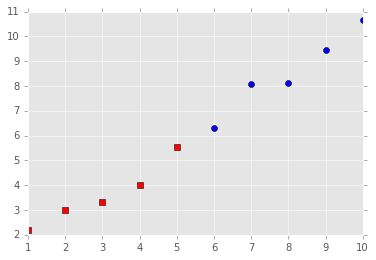

In [2]:
import random

random.seed(0)
train_data = [(i,i+random.random()*2-0.5) for i in range(1,6)]
trn_x,trn_y = zip(*train_data)
test_data = [(i,i+random.random()*2-0.5) for i in range(6,11)]
tst_x,tst_y = zip(*test_data)

plt.plot(trn_x, trn_y, 'sr')
plt.plot(tst_x, tst_y, 'ob')

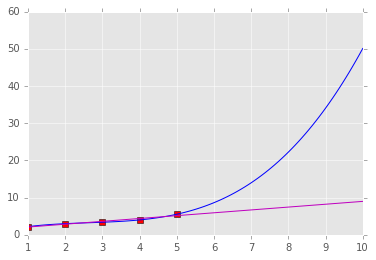

In [3]:
# What the scientists see
plt.plot(trn_x, trn_y, 'sr')

# Scientist 1
# Hmm... data look like poly with degree 3
p1 = np.poly1d(np.polyfit(trn_x, trn_y, deg=3))
x = np.linspace(1,10,100)
plt.plot(x,p1(x),'-b')

# Scientist 2
# Nah... I feel like the data should be linear because blah blah.
p2 = np.poly1d(np.polyfit(trn_x, trn_y, deg=1))
plt.plot(x,p2(x),'-m')

(-50, 50)

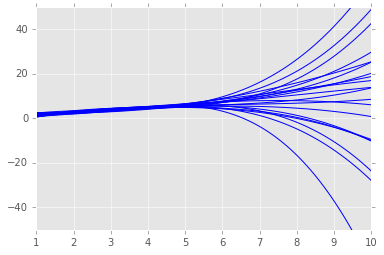

In [4]:
# Variation of scientist 1's models from multiple training sets
for j in range(20):
    train_data = [(i,i+random.random()*2-0.5) for i in range(1,6)]
    trn_x,trn_y = zip(*train_data)
    p1 = np.poly1d(np.polyfit(trn_x, trn_y, deg=3))
    x = np.linspace(1,10,100)
    plt.plot(x,p1(x),'-b')
plt.ylim([-50,50])
# plt.xlim([5,10])

(-50, 50)

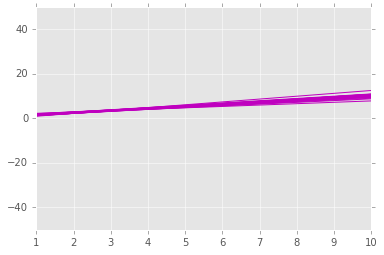

In [5]:
# Variation of scientist 2's models from multiple training sets
for j in range(20):
    train_data = [(i,i+random.random()*2-0.5) for i in range(1,6)]
    trn_x,trn_y = zip(*train_data)
    p2 = np.poly1d(np.polyfit(trn_x, trn_y, deg=1))
    x = np.linspace(1,10,100)
    plt.plot(x,p2(x),'-m')
plt.ylim([-50,50])

## Feature Extraction and Selection

If you are lucky, the features will be given to you. However, sometimes, you will have to invent features yourself. For example, in the "leaf" dataset, each example is an image and the features are measurements derived from the image.  
Feature extraction is a challenging task. Most of the time, you will need domain expertise to know exactly which features to choose and to add the model. Imagine trying to build a spam filter to predict whether an email is junk or not. Most models won’t know what to do with a raw email, which is just a collection of text. You’ll have to extract features. For example:

- Does the email contain the word “Viagra”?
- How many times does the letter d appear?
- What was the domain of the sender?


In [6]:
text = """
If you are lucky, the features will be given to you. However, sometimes, you will have to invent features yourself. For example, in the "leaf" dataset, each example is an image and the features are measurements derived from the image.
Feature extraction is a challenging task. Most of the time, you will need domain expertise to know exactly which features to choose and to add the model. Imagine trying to build a spam filter to predict whether an email is junk or not. Most models won’t know what to do with a raw email, which is just a collection of text. You’ll have to extract features. For example:
"""

import re
words = {}
# match three or more non-whitespace characters 
for eachtok in re.findall(r"\w{3,}",text):
    words[eachtok] = words.get(eachtok,0) + 1

#sorted_words = sorted(words.items(),key=lambda x: x[1],reverse=True)
sorted_words = sorted(words.items(),key=lambda x: len(x[0]),reverse=True)

print "how many times does the word 'the' appear?", words['the']
print "does the message contain 'spam'?", words['spam'] > 0
print "does the message contain a word with more than 6 characters?", len(sorted_words[0][0]) > 6

how many times does the word 'the' appear? 6
does the message contain 'spam'? True
does the message contain a word with more than 6 characters? True


## Naive Bayes Classifier

Take notes here:

Task: to classify spam messages
<table>
<tr>
<td></td><td>has Viagva</td><td>Label</td><td>Casino</td>
</tr>
<tr>
<td>1</td><td>1</td><td>1</td><td>0</td>
</tr>
<tr>
<td>2</td><td>1</td><td>1</td><td>1</td>
</tr>
<tr>
<td>3</td><td>0</td><td>0</td><td>0</td>
</tr>
<tr>
<td>4</td><td>0</td><td>0</td><td>0</td>
</tr>
<tr>
<td>5</td><td>0</td><td>1</td><td>1</td>
</tr>
<tr>
<td>6</td><td>1</td><td>0</td><td>1</td>
</tr>
<tr>
<td>7</td><td>0</td><td>0</td><td>0</td>
</tr>
<tr>
<td>8</td><td>0</td><td>0</td><td>0</td>
</tr>
<tr>
<td>9</td><td>0</td><td>0</td><td>1</td>
</tr>
<tr>
<td>10</td><td>0</td><td>1</td><td>1</td>
</tr>

</table>
____

Version 1 = we use only 1 feature ==> Does the message has Viagva?

Let S be the event "the massage is spam"
Let V be the event "the massage contains 'Viagva'"

P^(V)= 4/10, P^(S) = 4/10, P^(V|S) = 3/4

P(S|V) = (P(V|S)P(S))/P(V)
----

P(S|V) = ((3/4)(4/10))/(4/10) = 3/4 = 75%

_____
Version 2 = Use more words Let the words be w1,w2,w3,w4,.....,wn. Let Xi be the event "the message contains Wi"


P(S|Xi=x1,X2=x2,.......Xn=xn)
----
=================
for example:  
x1 ="Viagra", x2= "Casino", x3="winning"
email = "Win a lifetime supply of Viagra in our Casino today"

so ==> x1 = 1 , x2 = 1, x3 = 0

=================

P(S|Xi=x1,X2=x2,.......Xn=xn) = (P(Xi=x1,X2=x2,.......Xn=xn|S)P(S))/ P(Xi=x1,X2=x2,.......Xn=xn)

\# of paraas in the model = O(n) ==> 9P(x1=x1|s) P(x2=x2|S).....P(S)0/(P(x1-x1)p(x2=x2))



p^(x1=1) = 3/10,p^(x2=1) = 5/10, p^(x1=1|s) = 3/4, p^(x2=1|s) = 3/4, p^(s)=4/10

In [7]:
import re

words = {}
for i in range(1000):
    with open("spam/data/TRAIN_{0:05d}.eml".format(i),'r') as f:
        # match three or more non-whitespace characters 
        text = ''.join(f.readlines())
        for eachtok in re.findall(r"[a-zA-Z]\w{2,11}",text):
            words[eachtok] = words.get(eachtok,0) + 1
            
            

24411


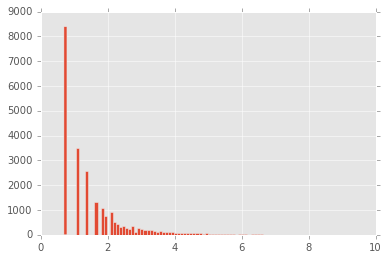

In [8]:
sorted_words = sorted(words.items(),key=lambda x: x[1],reverse=True)
filtered_sorted_words = [i for i in sorted_words if i[1] > 1]
w,c = zip(*filtered_sorted_words)
_ = plt.hist(np.log(c),bins=100)

print len(w)
# print w

In [9]:
def word_prob(word, words, k=1):
    words = dict(words)
    total = sum(words.values())
    return float(k+words.get(word, 0))/(2*k+total)

print word_prob("blocklist", filtered_sorted_words)

6.81286571842e-05


In [10]:
test = {}
with open("spam/data/TRAIN_{0:05d}.eml".format(1),'r') as f:
    # match three or more non-whitespace characters 
    text = ''.join(f.readlines())
    for eachtok in re.findall(r"[a-zA-Z]\w{2,10}",text):
        test[eachtok] = test.get(eachtok,0) + 1


In [11]:
score = 0.0
for w in test:
    score += np.log(word_prob(w,words,k=2))

In [12]:
labels = {}
with open("spam/data/TRAIN.label","r") as f:
    for line in f:
        tokens = line.split()
        labels[int(tokens[1][6:-4])] = tokens[0]

def word_prob_spam(word, words, labels, k=1):
    words = dict(words)
    total = sum(words.values())
    return float(k+words.get(word, 0))/(2*k+total)
        
print score
# print labels

-904.022435399


# Homework 

pnot_spamAll = 661  pspamAll = 0.17375 phamAll = 0.82625
26576
9673
23669
10614


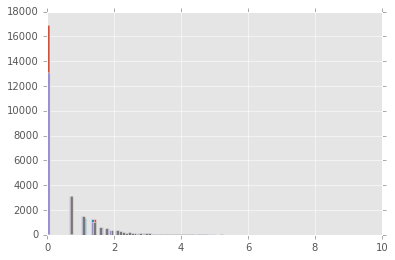

In [13]:
trainSpam = dict()
trainHam = dict()
for i in range(800):
#    if the labels came out as 1, so it is not a spam
    if(labels[i]=="1"):
        with open("spam/data/TRAIN_{0:05d}.eml".format(i), 'r') as f:
            text = ''.join(f.readlines())
            for eachtok in re.findall(r"[a-zA-Z]{2,10}",text):
                trainHam[eachtok.lower()] = trainHam.get(eachtok.lower(),0) + 1
    else: # else if the labels came our as 1, so it a spam
        with open("spam/data/TRAIN_{0:05d}.eml".format(i), 'r') as f:
            text = ''.join(f.readlines())
            for eachtok in re.findall(r"[a-zA-Z]{2,10}",text):
                trainSpam[eachtok.lower()] = trainSpam.get(eachtok.lower(),0) + 1
# print 'trainSpam = ', trainSpam
# print 'trainHam = ', trainHam


# --------------------------------------------------
pnot_spamAll = np.sum(list(map(int, labels.values())))
pspamAll = (800.-pnot_spamAll)/800.
phamAll = pnot_spamAll/800.

print 'pnot_spamAll =',pnot_spamAll , ' pspamAll =', pspamAll , 'phamAll =', phamAll



# --------------------------------------------------

sort_word_spam = sorted(trainSpam.items(),key=lambda x: x[1],reverse=True)
w,c = zip(*sort_word_spam)
print len(w)
plt.hist(np.log(c),bins=100);
# ----------------
filter_sort_word_spam = [i for i in sort_word_spam if i[1]>1]
w,c = zip(*filter_sort_word_spam)
plt.hist(np.log(c),bins=100);
print len(w)
# ----------------
sort_ham_word = sorted(trainHam.items(),key=lambda x: x[1],reverse=True)
w,c = zip(*sort_ham_word)
plt.hist(np.log(c),bins=100);
print len(w)
# ----------------
filter_sort_ham_word = [i for i in sort_ham_word if i[1]>1]
w,c = zip(*filter_sort_ham_word)
plt.hist(np.log(c),bins=100);
print len(w)

# --------------------------------------------------




def calculate(words, filter_word, p):
    p_score = 0.0
    for w in words:
        p_score += np.log(word_prob(w,filter_word))
    p_score += np.log(p)
    return p_score
    


def main(start, stop):
    #keep correct score and wrong score
    c_score, w_score, true_pos,true_neg,false_pos,false_neg = 0., 0., 0., 0., 0., 0.
    #then we loop train and test 80% is train and 20% is test
    for i in range(start, stop):
        #we keep each words in each massage
        words = []
        with open("spam/data/TRAIN_{0:05d}.eml".format(i), 'r') as f:
            text = ''.join(f.readlines())
            for eachtok in re.findall(r"[a-zA-Z]{2,10}",text):
                words.append(eachtok)
        sp = calculate(words, filter_sort_word_spam, pspamAll)
        hm = calculate(words, filter_sort_ham_word, phamAll)
        #check it is spam or ham
        if (sp>hm):
            if(labels[i]=="1"):
                w_score +=1
                false_pos+=1
            else:
                c_score += 1
                true_pos += 1
        else: #if it is not a spam 
            if(labels[i]=="0"):
                w_score += 1
                false_neg +=1
            else:
                c_score += 1
                true_neg +=1
    return c_score, w_score, true_pos,true_neg,false_pos,false_neg



# --------------------------------------------------





### Train 

In [14]:
correct, wrong, true_pos,true_neg,false_pos,false_neg = main(0, 800)
# ---------------------
# accuracy = (true_pos+true_neg) / len(train_answer)
# percision = true_pos / (true_pos+false_pos)
# recall = true_pos / (true_pos+false_neg)
# ---------------------
accuracy = correct/(correct+wrong)
accuracy2 =(true_pos+true_neg) / 800.
percision = true_pos / (true_pos+false_pos)
recall = true_pos / (true_pos+false_neg)
print "correct =", correct, "wrong =", wrong, "true_pos =",true_pos, 'true_neg =',true_neg, 'false_pos =',false_pos,'false_neg =', false_neg
print  'accuracy of train data = ', accuracy 
print  'accuracy2 of train data = ', accuracy2 
print 'percision of train data = ', percision
print 'recall of train data = ', recall

correct = 793.0 wrong = 7.0 true_pos = 271.0 true_neg = 522.0 false_pos = 4.0 false_neg = 3.0
accuracy of train data =  0.99125
accuracy2 of train data =  0.99125
percision of train data =  0.985454545455
recall of train data =  0.989051094891


### Test

In [18]:
correct, wrong, true_pos,true_neg,false_pos,false_neg = main(800, 1000)
accuracy = correct/(correct+wrong)
accuracy2 =(true_pos+true_neg) / 200.
percision = true_pos / (true_pos+false_pos)
recall = true_pos / (true_pos+false_neg)
print "correct =", correct, "wrong =", wrong, "true_pos =",true_pos, 'true_neg =',true_neg, 'false_pos =',false_pos,'false_neg =', false_neg
print  'accuracy of train data = ', accuracy
print  'accuracy2 of train data = ', accuracy2 
print 'percision of train data = ', percision
print 'recall of train data = ', recall

correct = 189.0 wrong = 11.0 true_pos = 63.0 true_neg = 126.0 false_pos = 9.0 false_neg = 2.0
accuracy of train data =  0.945
accuracy2 of train data =  0.945
percision of train data =  0.875
recall of train data =  0.969230769231
